0.2


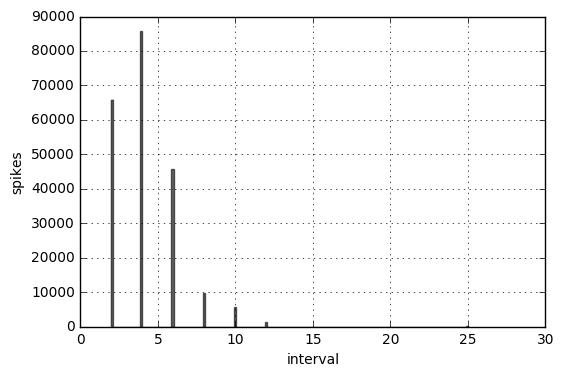

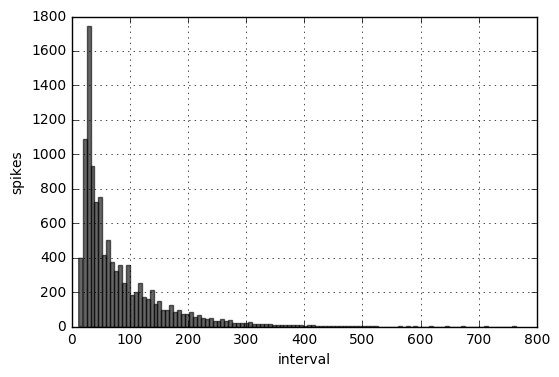

(array([  3.99000000e+02,   1.04000000e+03,   1.42700000e+03,
         1.35400000e+03,   7.50000000e+02,   5.85000000e+02,
         4.92000000e+02,   5.24000000e+02,   3.69000000e+02,
         3.52000000e+02,   4.01000000e+02,   2.92000000e+02,
         2.33000000e+02,   2.04000000e+02,   2.74000000e+02,
         2.14000000e+02,   1.79000000e+02,   2.10000000e+02,
         1.58000000e+02,   1.54000000e+02,   1.16000000e+02,
         1.44000000e+02,   1.10000000e+02,   1.25000000e+02,
         1.30000000e+02,   7.90000000e+01,   7.50000000e+01,
         6.10000000e+01,   6.90000000e+01,   5.90000000e+01,
         4.50000000e+01,   6.50000000e+01,   3.80000000e+01,
         3.70000000e+01,   3.60000000e+01,   5.10000000e+01,
         2.60000000e+01,   3.50000000e+01,   2.30000000e+01,
         2.70000000e+01,   1.90000000e+01,   3.10000000e+01,
         3.40000000e+01,   2.20000000e+01,   9.00000000e+00,
         1.70000000e+01,   1.60000000e+01,   1.20000000e+01,
         1.70000000e+01

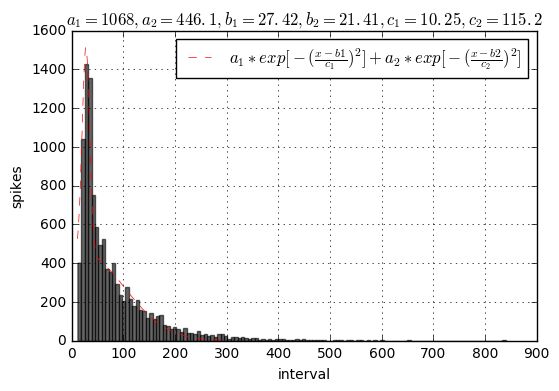

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

n = 900000
a = 1
alpha = .2
d = .45
r = 0.9
b = 4.95

x1 = np.zeros(n)
x2 = np.zeros(n)
x3 = np.zeros(n)
step = np.zeros(n)
x1[0] = .4

x2[0] = .45
x3[0] = .47
x1_start = np.zeros(n)
x2_start = np.zeros(n)
x3_start = np.zeros(n)

def hist(x: object, Bool: object = True, quantity: object = 'auto', col: object = 'black', alp: object = .6) -> object:
    if Bool:
        plt.hist(x, quantity, color=col, alpha=alp)
        plt.xlabel('interval')
        plt.ylabel('spikes')
        plt.grid(True)
        plt.show()
    else:
        return plt.hist(x, quantity, color=col, alpha=alp)


def F(x):
    if (x <= a):
        return alpha * x
    if (x > a):
        return alpha * x + alpha * (b - a)


print(F(1))


def f1(x1, x2, x3):
    return F(x1) + d * (x2 + x3 - 2 * x1)


def f2(x1, x2, x3):
    return F(x2) + d * (x1 - x2 + r * (x3 - x2))


def f3(x1, x2, x3):
    return F(x3) + d * (x1 - x3 + r * (x2 - x3))


x1_step = []
x2_step = []
x3_step = []

t1 = 0
t2 = 0
t3 = 0
for i in range(n - 1):

    x1[i + 1] = f1(x1[i], x2[i], x3[i])
    x2[i + 1] = f2(x1[i], x2[i], x3[i])
    x3[i + 1] = f3(x1[i], x2[i], x3[i])
    if x1[i + 1] > a:
        x1_start[i + 1] = 1
        x1_step.append((i + 1) - t1)
        t1 = i + 1
    if x2[i + 1] > a:
        x2_start[i + 1] = 1
        x2_step.append((i + 1) - t2)
        t2 = i + 1
    if x3[i + 1] > a:
        x3_start[i + 1] = 1
        x3_step.append((i + 1) - t3)
        t3 = i + 1
    step[i] = i
step[n - 1] = n




hist(x1_step)
hist(x2_step)


def apr(x):
    a1 = 1068
    b1 = 27.42
    c1 = 10.25
    a2 = 446.1
    b2 = 21.41
    c2 = 115.2
    return a1 * np.exp(-((x - b1) / c1) ** 2) + a2 * np.exp(-((x - b2) / c2) ** 2)


ap = np.zeros(300 - 11)
ax_st = np.zeros(300 - 11)
for i in range(11, 300, 1):
    ap[i - 11] = apr(i)
    ax_st[i - 11] = i
l = hist(x3_step, Bool=False)
pprint.pprint(l)
file_1 = open("snake.txt", "w")

file_1.write(str(l[0]))
file_1.close()
plt.xlabel('interval')
plt.ylabel('spikes')

plt.plot(ax_st, ap, linestyle='--', color='red', alpha=1, linewidth=.5, label=r'$a_1*exp[-(\frac{x-b1}{c_1})^2] '
                                                                              r'+a_2*exp[-(\frac{x-b2}{c_2})^2]$')
plt.grid(True)
plt.title(r'$a_1 = 1068, a_2 = 446.1, b_1 = 27.42, b_2 = 21.41, c_1 = 10.25, c_2 = 115.2$')
plt.legend()
plt.show()
###

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.